In [24]:
#Packages:
import pandas as pd
import numpy as np
import pyreadr as pyr
import sklearn as sk
import scipy as sc
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sns
from bootstrap_stat import bootstrap_stat as bp
from scipy.stats import bootstrap
from sklearn.impute import KNNImputer

In [25]:
bd=pyr.read_r("C:/Users/hp/OneDrive - Universidad de los Andes/Documentos/Docs/Universidad/2022-2/Big Data/Taller 1/Repo/bdPS1.Rdata")
#Revisar ruta del directorio
print(bd.keys()) #Load database.
df0=bd["df"]
df=df0.drop(df0[df0.age<18].index) #Restrict the data to legal age individuals (age>=18).
df=df.drop(df[df.ocu==0].index) #Restrict the data to employed individuals (ocu==1).
dfsi=(df[["age", "maxEducLevel", "sizeFirm", "oficio", "hoursWorkUsual", "formal", "ingtot", "mes", "estrato1", "sex", 
"regSalud", "p6426", "p7090","p7510s7a1", "impa", "isa", "impaes", "isaes", "relab"]]) #Relevant variables selection. 

odict_keys(['df'])


In [26]:
#Reassining variables codification:
dfsi["impa"].replace(0, 1, inplace=True)
dfsi["impa"].replace(np.nan, 0, inplace=True)
dfsi["impaes"].replace(0, 1, inplace=True)
dfsi["impaes"].replace(np.nan, 0, inplace=True)
dfsi["isa"].replace(0, 1, inplace=True)
dfsi["isa"].replace(np.nan, 0, inplace=True)
dfsi["isaes"].replace(0, 1, inplace=True)
dfsi["isaes"].replace(np.nan, 0, inplace=True)

#Create compiled variables:
dfsi["impacomp"]=dfsi["impa"]+dfsi["impaes"]
dfsi["isacomp"]=dfsi["isa"]+dfsi["isaes"]

#Recover missing values: 
dfsi['impacomp']=dfsi['impacomp'].replace(0,np.nan)
dfsi['isacomp']=dfsi['isacomp'].replace(0,np.nan)
dfsi['impacomp']=dfsi['impacomp'].replace(1, 0)
dfsi['isacomp']=dfsi['isacomp'].replace(1, 0)
dfsi['impacomp']=dfsi['impacomp'].replace(2, 0)
dfsi['isacomp']=dfsi['isacomp'].replace(2, 0)

#Missing values count/share. 
dfsi.isnull().sum() 
dfsi.isnull().sum()/len(dfsi) 

C:\Users\hp\AppData\Local\Temp\ipykernel_39816\2900239718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsi["impa"].replace(0, 1, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_39816\2900239718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsi["impa"].replace(np.nan, 0, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_39816\2900239718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsi["impaes"].replace

age               0.000000
maxEducLevel      0.000060
sizeFirm          0.000000
oficio            0.000000
hoursWorkUsual    0.000000
formal            0.000000
ingtot            0.000000
mes               0.000000
estrato1          0.000000
sex               0.000000
regSalud          0.085842
p6426             0.000000
p7090             0.000000
p7510s7a1         0.000000
impa              0.000000
isa               0.000000
impaes            0.000000
isaes             0.000000
relab             0.000000
impacomp          0.014992
isacomp           0.001874
dtype: float64

In [27]:
#Imputing missing values:
imputer=KNNImputer(n_neighbors=19) 
imputer.fit(dfsi)
dfi=pd.DataFrame(imputer.transform(dfsi))
dict=({0: "age", 1: "maxEducLevel", 2: "sizeFirm", 3: "oficio", 4: "hoursWorkUsual", 5: "formal", 6: "ingtot", 7: "mes", 8: "estrato1", 
9: "sex", 10: "regSalud", 11: "p6426", 12: "p7090", 13: "p7510s7a1", 14: "impa", 15: "isa", 16: "impaes", 17: "isaes", 18: "relab", 
19: "impacomp", 20: "isacomp"})
dfi.rename(columns=dict, inplace=True)

In [28]:
#Convert categorical variables to dummy variables:
oficio_d=pd.get_dummies(dfi["oficio"], prefix="oficio") 
sizeFirm_d=pd.get_dummies(dfi["sizeFirm"], prefix="size") 
estrato1_d=pd.get_dummies(dfi["estrato1"], prefix="estrato") 
regSalud_d=pd.get_dummies(dfi["regSalud"], prefix="regs") 
maxeduc_d=pd.get_dummies(dfi["maxEducLevel"], prefix="educ") 
relab_d=pd.get_dummies(dfi["relab"], prefix="relab") 
relab_d=pd.get_dummies(dfi["relab"], prefix="relab") 
mes_d=pd.get_dummies(dfi["mes"], prefix="mes")

#Merge dummy's variables data frame with master data frame:
dfi=pd.merge(dfi, oficio_d, left_index=True, right_index=True) 
dfi=pd.merge(dfi, sizeFirm_d, left_index=True, right_index=True)
dfi=pd.merge(dfi, estrato1_d, left_index=True, right_index=True)
dfi=pd.merge(dfi, regSalud_d, left_index=True, right_index=True)
dfi=pd.merge(dfi, maxeduc_d, left_index=True, right_index=True)
dfi=pd.merge(dfi, relab_d, left_index=True, right_index=True)
dfi=pd.merge(dfi, mes_d, left_index=True, right_index=True)
dfi["p7090"]=np.where(dfi["p7090"]==2, 0, 1)

In [29]:
#Transform categorial atribute variables to numerical variable: 
dfi["hoursWorkUsual"]=pd.to_numeric(dfi["hoursWorkUsual"])
dfi["formal"]=pd.to_numeric(dfi["formal"])
dfi["p6426"]=pd.to_numeric(dfi["p6426"])

#Descriptive statistics data frame:
ds=(dfi[["age", "hoursWorkUsual", "p6426", "sex", "formal", "p7090", "estrato_1.0", "estrato_2.0", "estrato_3.0", "estrato_4.0", 
"estrato_5.0", "estrato_6.0", "regs_1.0", "regs_2.0", "regs_3.0", "educ_1.0", "educ_3.0", "educ_4.0", "educ_5.0", 
"educ_6.0", "educ_7.0"]].describe(include="all"))
ds=ds.T
ds=ds[["count", "mean", "std", "min", "50%", "max"]]
ds=ds.round(2)
print(ds.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &    count &   mean &    std &   min &   50\% &    max \\
\midrule
age            &  16542.0 &  39.44 &  13.48 &  18.0 &  38.0 &   94.0 \\
hoursWorkUsual &  16542.0 &  47.01 &  15.54 &   1.0 &  48.0 &  130.0 \\
p6426          &  16542.0 &  63.76 &  89.49 &   0.0 &  24.0 &  720.0 \\
sex            &  16542.0 &   0.53 &   0.50 &   0.0 &   1.0 &    1.0 \\
formal         &  16542.0 &   0.59 &   0.49 &   0.0 &   1.0 &    1.0 \\
p7090          &  16542.0 &   0.10 &   0.30 &   0.0 &   0.0 &    1.0 \\
estrato\_1.0    &  16542.0 &   0.11 &   0.31 &   0.0 &   0.0 &    1.0 \\
estrato\_2.0    &  16542.0 &   0.42 &   0.49 &   0.0 &   0.0 &    1.0 \\
estrato\_3.0    &  16542.0 &   0.36 &   0.48 &   0.0 &   0.0 &    1.0 \\
estrato\_4.0    &  16542.0 &   0.07 &   0.25 &   0.0 &   0.0 &    1.0 \\
estrato\_5.0    &  16542.0 &   0.02 &   0.14 &   0.0 &   0.0 &    1.0 \\
estrato\_6.0    &  16542.0 &   0.03 &   0.16 &   0.0 &   0.0 &    1.0 \\
regs\_1.0       &  16542.0

C:\Users\hp\AppData\Local\Temp\ipykernel_39816\2295937556.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(ds.to_latex())


In [30]:
#Create dependent variable:
dfi["earnings"]=dfi["impacomp"]+dfi["isacomp"]
dfi["earnings"].describe()

count    1.654200e+04
mean     1.608618e+06
std      2.346376e+06
min      0.000000e+00
25%      7.812420e+05
50%      9.913334e+05
75%      1.566667e+06
max      5.250000e+07
Name: earnings, dtype: float64

In [31]:
#Winsorize data:
sc.stats.mstats.winsorize(dfi["earnings"], limits=[0,0.05], inplace=True)
sc.stats.mstats.winsorize(dfi["age"], limits=[0,0.05], inplace=True)

#Create cuadratic age variable:
dfi["age2"]=dfi["age"]**2

#OLS regresion model:
y=dfi["earnings"]
x=dfi[["age", "age2"]]
x=sm.add_constant(x)
model1=sm.OLS(y,x)
results=model1.fit()
yhatp1=results.predict()
b1=results.params[1]
b2=results.params[2]
elasticidad=-b1/2*b2
print(results.summary())
print(np.sqrt(results.mse_resid))

                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     310.2
Date:                Mon, 05 Sep 2022   Prob (F-statistic):          5.83e-133
Time:                        10:26:09   Log-Likelihood:            -2.5469e+05
No. Observations:               16542   AIC:                         5.094e+05
Df Residuals:                   16539   BIC:                         5.094e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -9.33e+05    9.4e+04     -9.928      0.0

In [32]:
#Bootstrap 
seboot=[0]*3
for j in range(0,3):
    def estimador(dfi):
        y=dfi["earnings"]
        x=dfi[["age", "age2"]]
        x=sm.add_constant(x)
        model1=sm.OLS(y,x)
        results= model1.fit()
        return results.params[j]

    dist = bp.EmpiricalDistribution(dfi)
    sea=bp.standard_error(dist, estimador, B=5)
    seboot[j]=sea

In [33]:
b0=results.params[0]
b1=results.params[1]
b2=results.params[2]

b0low=b0-seboot[0]*1.96
b1low=b1-seboot[1]*1.96
b2low=b2-seboot[2]*1.96

b0upper=b0+seboot[0]*1.96
b1upper=b1+seboot[1]*1.96
b2upper=b2+seboot[2]*1.96

yhatlow=b0low+b1low*dfi['age']+b2low*dfi['age2']
yhatupper=b0upper+b1upper*dfi['age']+b2upper*dfi['age2']


In [36]:
betalow = [b0low,b1low, b2low]
betalow

[-1135554.6285318378, 117208.31615618043, -1472.6658903250898]

In [37]:
betaupper = [b0upper,b1upper, b2upper]
betaupper

[-730423.5742377219, 125642.64520124366, -1384.469034067549]

In [55]:
edad = pd.DataFrame(dfi['age']).to_numpy()
edad

array([[36.],
       [51.],
       [45.],
       ...,
       [24.],
       [36.],
       [41.]])

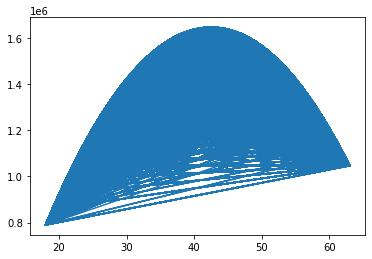

In [58]:
#Graph
fig, ax = plt.subplots()
ax.plot(edad, yhatp1)
#ax.fill_between(dfi['age'], yhatlow, yhatupper, color='b',alpha=0.1)

#ax.scatter(dfi['age'], yhatlow)
#ax.scatter(dfi['age'], yhatp1)
#ax.fill_between(dfi['age'], yhatlow, yhatupper, color='b', alpha=.1)

In [152]:
#Bootstrap, Earnings(Age,Age2)
def estimador0(dfi):
    y=dfi["earnings"]
    x=dfi[["age", "age2"]]
    x=sm.add_constant(x)
    model1=sm.OLS(y,x)
    results= model1.fit()
    return results.params[0]

def estimadora(dfi):
    y=dfi["earnings"]
    x=dfi[["age", "age2"]]
    x=sm.add_constant(x)
    model1=sm.OLS(y,x)
    results= model1.fit()
    return results.params[1]

def estimadora2(dfi):
    y=dfi["earnings"]
    x=dfi[["age", "age2"]]
    x=sm.add_constant(x)
    model1=sm.OLS(y,x)
    results= model1.fit()
    return results.params[2]

In [153]:
dist = bp.EmpiricalDistribution(dfi)
sea=bp.standard_error(dist, estimadora, B=1000)
sea2=bp.standard_error(dist, estimadora2, B=1000)
secons=bp.standard_error(dist, estimador0, B=1000)

In [154]:
se=[secons,sea,sea2]
se

[81754.00205122671, 4505.646536853562, 56.908574721285056]

In [155]:
b0=results.params[0]
b1=results.params[1]
b2=results.params[2]

b0low=(b0-secons*1.96)
b1low=(b1-sea*1.96)
b2low=(b2-sea2*1.96)

b0upper=(b0+secons*1.96)
b1upper=(b1+sea*1.96)
b2upper=(b2+sea2*1.96)

yhatlow=b0low+b1low*dfi['age']+b2low*dfi['age2']
yhatupper=b0upper+b1upper*dfi['age']+b2upper*dfi['age2']

In [156]:
#Create female variable:
dfi["female"]=np.where(dfi["sex"]==1, 0, 1)
dfi=dfi.drop(dfi[dfi.earnings==0].index)
dfi["log_earnings"]=np.log(dfi["earnings"])

#Regresion model:
y=dfi["log_earnings"]
x=dfi["female"]
x=sm.add_constant(x)
model2=sm.OLS(y,x)
results= model2.fit()
print(results.summary())
print(np.sqrt(results.mse_resid))

                            OLS Regression Results                            
Dep. Variable:           log_earnings   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     316.0
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           4.97e-70
Time:                        17:55:33   Log-Likelihood:                -20232.
No. Observations:               16266   AIC:                         4.047e+04
Df Residuals:                   16264   BIC:                         4.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9577      0.009   1549.028      0.0

In [157]:
y_hat=results.predict()
from math import e

y_hat2=e**(y_hat)

In [158]:
E = dfi["earnings"]-y_hat2
E2 = E**2
MSE=sum(E2)/(len(E2)-2)

In [159]:
np.sqrt(MSE)

1249025.8306752015

In [160]:
#Create interactions variable:
dfi["female_age"]=dfi["female"]*dfi["age"]
dfi["female_age2"]=dfi["female"]*dfi["age2"]

#OLS regresion model:
y=dfi["log_earnings"]
x=dfi[["age", "female", "female_age", "female_age2", "age2"]]
x=sm.add_constant(x)
model3=sm.OLS(y,x)
results= model3.fit()
print(results.summary())
print(np.sqrt(results.mse_resid))

                            OLS Regression Results                            
Dep. Variable:           log_earnings   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     317.0
Date:                Sun, 04 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:55:34   Log-Likelihood:                -19632.
No. Observations:               16266   AIC:                         3.928e+04
Df Residuals:                   16260   BIC:                         3.932e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.0251      0.089    135.761      

In [161]:
#rMSE to COP units:
y_hat=results.predict()
y_hat2=e**(y_hat)
E = dfi["earnings"]-y_hat2
E2 = E**2
MSE=sum(E2)/(len(E2)-6)
print(np.sqrt(MSE))

1221026.8513533957


In [162]:
oficio=["oficio_1.0"]
for i in range(2,99):
    oficio.append("oficio_"+str(i)+".0")
    list1=['oficio_10.0', 'oficio_22.0', 'oficio_23.0', 'oficio_24.0', 'oficio_25.0', 'oficio_26.0', 'oficio_27.0', 'oficio_28.0', 'oficio_29.0', 'oficio_46.0', 'oficio_47.0', 'oficio_48.0', 'oficio_64.0', 'oficio_65.0', 'oficio_66.0', 'oficio_67.0', 'oficio_68.0', 'oficio_69.0', 'oficio_71.0']
    oficio2=[i for i in oficio if i not in list1]

#Long regression
#Define exogenous and endogenous variables:
y=dfi["log_earnings"]
x0=dfi[["female"]]
x1=(dfi[["age","age2", "sizeFirm", "hoursWorkUsual", "formal", "p6426", "educ_3.0", "educ_4.0", 
"educ_5.0", "educ_6.0", "educ_7.0", "relab_2.0", "relab_3.0" , "relab_4.0", "relab_5.0", "relab_6.0", 
"relab_7.0", "relab_8.0" , "relab_9.0", "mes_1.0", "mes_2.0", "mes_3.0", "mes_4.0", "mes_5.0", "mes_6.0", 
"mes_7.0", "mes_9.0", "mes_10.0", "mes_11.0", "mes_12.0"]])
x2=dfi[oficio2]
x=pd.concat([x0,x1,x2], axis=1, join="inner")
x=sm.add_constant(x)

#OLS regresion model:
model2=sm.OLS(y,x)
results= model2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           log_earnings   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     182.0
Date:                Sun, 04 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:55:34   Log-Likelihood:                -13833.
No. Observations:               16266   AIC:                         2.789e+04
Df Residuals:                   16155   BIC:                         2.874e+04
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.9610      0.090    121.

In [185]:
se_boot = []
for koef in range(0,5):

    def estm(dfi):

        #FWL theorem
        #Define exog and endog variables
        oficio=["oficio_1.0"]
        for i in range(2,99):
            oficio.append("oficio_"+str(i)+".0")
            list1=['oficio_10.0', 'oficio_22.0', 'oficio_23.0', 'oficio_24.0', 'oficio_25.0', 'oficio_26.0', 'oficio_27.0', 'oficio_28.0', 'oficio_29.0', 'oficio_46.0', 'oficio_47.0', 'oficio_48.0', 'oficio_64.0', 'oficio_65.0', 'oficio_66.0', 'oficio_67.0', 'oficio_68.0', 'oficio_69.0', 'oficio_71.0']
            oficio2=[i for i in oficio if i not in list1]

        y=dfi["log_earnings"]
        x0=dfi[['female', "age", "age2", "female_age", "female_age2"]]
        x1=dfi[["sizeFirm", "hoursWorkUsual","formal", "p6426","educ_3.0", "educ_4.0", 
            "educ_5.0", "educ_6.0", "educ_7.0", "relab_2.0", "relab_3.0" , "relab_4.0","relab_5.0" , "relab_6.0" , "relab_7.0" , "relab_8.0" , "relab_9.0",
            "mes_1.0", "mes_2.0", "mes_3.0", "mes_4.0", "mes_5.0", "mes_6.0", "mes_7.0","mes_9.0", "mes_10.0", "mes_11.0", "mes_12.0"]]
        x2=dfi[oficio2]
        x_f = pd.concat([x1,x2], axis=1, join="inner")
        x_f=sm.add_constant(x_f)
        x0=sm.add_constant(x0)

        #Residuals of log_earnings regressed on controls
        model3=sm.OLS(y,x_f)
        results_f= model3.fit()
        resid_a=results_f.resid

        #residuals of female regressed on controls
        model4=sm.OLS(x0, x_f)
        results_f2= model4.fit()
        resid_b=results_f2.resid

        #Delete constant from residuals b
        resid_b=resid_b.drop(['const'], axis=1)

        #Results of resid_a  regressed on resid_b
        model_FWL=sm.OLS(resid_a,resid_b)
        results_FWL=model_FWL.fit()

        return results_FWL.params[koef]

    dist = bp.EmpiricalDistribution(dfi)
    se_koef=bp.standard_error(dist,estm, B=1000)
    se_boot = se_boot + [str(se_koef)]
    print(se_koef)

0.09730905503389506
0.0032444138877103412
4.0672034325216646e-05
0.005409740794449886
6.179930491189999e-05


In [178]:
se_boot
# Revisar orden female vs age

dtype('float64')